# 互评作业: 数据探索性分析与数据预处理

使用的数据集：  
    1. Wine Reviews  
    2. Chicago Building Violations

代码地址：  


## 1. Wine Reviews  
### 1.1 概述
+ 数据说明  
    "country":葡萄酒所属国家  
    "description":关于葡萄酒的说明  
    "designation":葡萄的产地  
    "points":葡萄酒的评分  
    "price":一瓶葡萄酒的价格  
    "province":生产葡萄酒的省份  
    "region_1":葡萄种植地  
    "region_2":葡萄特定种植地  
    "taster_name":品酒师  
    "taster_twitter_handle":品酒师的推特  
    "title":葡萄酒评论的标题  
    "variety":用于制酒的葡萄的品种  
    "winery":酿酒厂  
    
其中，price、points属于数值属性，其余属于标称属性。

+ 实验环境  
实现语言：Python  
依赖的包：numpy,pandas,matplotlib

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.impute  import KNNImputer
from sklearn.linear_model import LinearRegression

### 1.2 数据可视化和摘要

**数据摘要：**  
+ 标称属性，给出每个可能取值的频数  
+ 数值属性，给出5数概括及缺失值的个数


标称属性：  
(1). winemag-data_first150k.csv
+ country

|country|counts|
|:--:|:--:|
| US | 62397 |
| Italy | 23478 |
| France | 21098 |
| Spain | 8268 |
| Chile | 5816 |
| Argentina | 5631 |
| Portugal | 5322 |
| Australia | 4957 |
| New Zealand | 3320 |
| Austria | 3057 |
| Germany | 2452 |
| South Africa | 2258 |
| Greece | 884 |
| Israel | 630 |
| Hungary | 231 |
| Canada | 196 |
| Romania | 139 |
| Slovenia | 94 |
| Uruguay | 92 |
| Croatia | 89 |
| Bulgaria | 77 |
| Moldova | 71 |
| Mexico | 63 |
| Turkey | 52 |
| Georgia | 43 |
| Lebanon | 37 |
| Cyprus | 31 |
| Brazil | 25 |
| Macedonia | 16 |
| Serbia | 14 |
| Morocco | 12 |
| England | 9 |
| Luxembourg | 9 |
| Lithuania | 8 |
| India | 8 |
| Czech Republic | 6 |
| Ukraine | 5 |
| Switzerland | 4 |
| South Korea | 4 |
| Bosnia and Herzegovina | 4 |
| Slovakia | 3 |
| China | 3 |
| Egypt | 3 |
| Tunisia | 2 |
| Montenegro | 2 |
| Albania | 2 |
| Japan | 2 |
| US-France | 1 |


由于其他标称属性的可能取值过多，不在此一一列举。

In [9]:
path1 = './winereviews/winemag-data_first150k.csv'
train1 = pd.read_csv(path1)
counts1 = train1['country'].value_counts()
# print(counts1)

(2). winemag-data-130k-v2.csv
+ country

|country|counts|
|:--:|:--:|
| US | 54504 |
| France | 22093 |
| Italy | 19540 |
| Spain | 6645 |
| Portugal | 5691 |
| Chile | 4472 |
| Argentina | 3800 |
| Austria | 3345 |
| Australia | 2329 |
| Germany | 2165 |
| New Zealand | 1419 |
| South Africa | 1401 |
| Israel | 505 |
| Greece | 466 |
| Canada | 257 |
| Hungary | 146 |
| Bulgaria | 141 |
| Romania | 120 |
| Uruguay | 109 |
| Turkey | 90 |
| Slovenia | 87 |
| Georgia | 86 |
| England | 74 |
| Croatia | 73 |
| Mexico | 70 |
| Moldova | 59 |
| Brazil | 52 |
| Lebanon | 35 |
| Morocco | 28 |
| Peru | 16 |
| Ukraine | 14 |
| Serbia | 12 |
| Macedonia | 12 |
| Czech Republic | 12 |
| Cyprus | 11 |
| India | 9 |
| Switzerland | 7 |
| Luxembourg | 6 |
| Bosnia and Herzegovina | 2 |
| Armenia | 2 |
| China | 1 |
| Egypt | 1 |
| Slovakia | 1 |


由于其他标称属性的可能取值过多，不在此一一列举。

In [8]:
path2 = './winereviews/winemag-data-130k-v2.csv'
train2 = pd.read_csv(path2)
counts2 = train2['country'].value_counts()
# print(counts2)

数值属性：  
(1). winemag-data_first150k.csv  
+ 均值、标准差、5数概括

||points|price|
|:--:|:--:|:--:|
|mean|87.8884|33.1315|
|std|3.2224|36.3225|
|min|80|4|
|25%|86|16|
|50%|88|24|
|75%|90|40|
|max|100|2300|
    
+ 缺失值个数

||缺失值个数|
|:--:|:--:|
|points|0|
|price|13695|

In [11]:
m1 = train1.describe()
# print(m1)
n1 = train1.isnull().sum()
# print(n1)

(2). winemag-data-130k-v2.csv
+ 均值、标准差、5数概括

||points|price|
|:--:|:--:|:--:|
|mean|88.4471|35.3634|
|std|3.0397|41.0222|
|min|80|4|
|25%|86|17|
|50%|88|25|
|75%|91|42|
|max|100|3300|

  + 缺失值个数

||缺失值个数|
|:--:|:--:|
|points|0|
|price|8996|

In [13]:
m2 = train2.describe()
# print(m2)
n2 = train2.isnull().sum()
# print(n2)

**数据可视化：**  
+ 使用直方图、盒图等检查数据分布及离群点

(1). winemag-data_first150k.csv   
+ 直方图

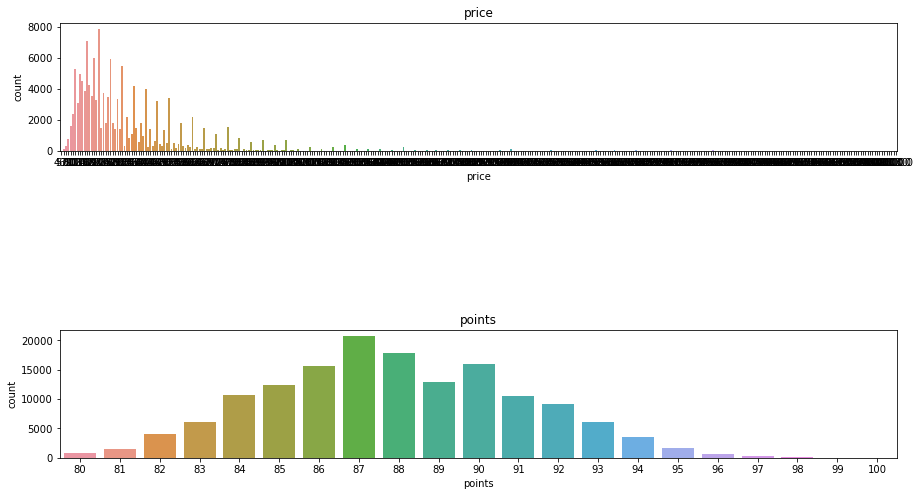

In [63]:
plt.figure(figsize=(15,8))
plt.subplot(311)
sns.countplot(train1.price)
# sns.distplot(train1.price)
plt.title('price')
plt.subplot(313)
# plt.figure(figsize=(15,5))
sns.countplot(train1.points)
plt.title('points')
plt.show()

+ 盒图

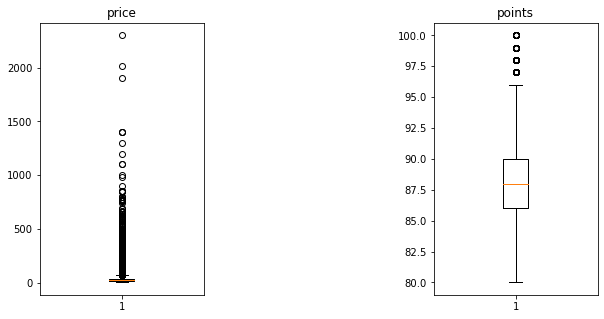

In [150]:
plt.figure(figsize=(10,5))
plt.subplot(131)
plt.boxplot(train1.price.dropna())
plt.title('price')
plt.subplot(133)
plt.boxplot(train1.points)
plt.title('points')
plt.show()

(2). winemag-data-130k-v2.csv   
+ 直方图

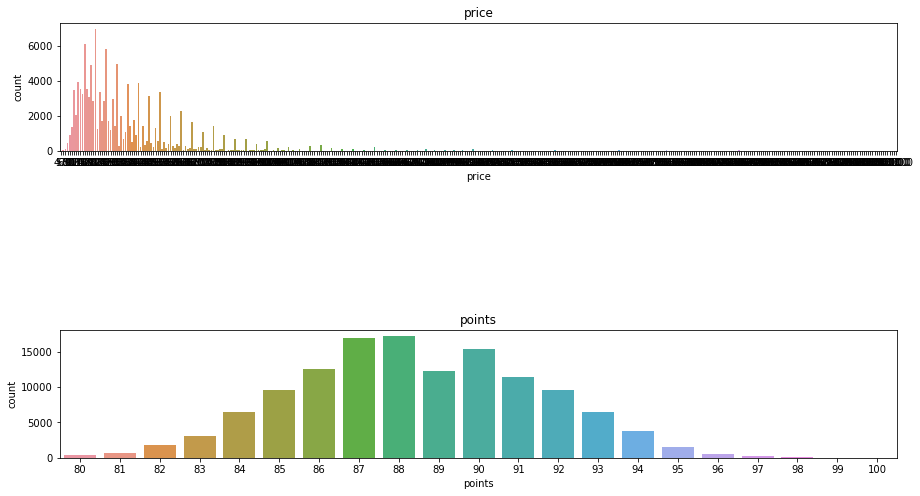

In [99]:
plt.figure(figsize=(15,8))
plt.subplot(311)
# plt.hist(train2.price,1000)
sns.countplot(train2.price)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
# plt.tight_layout()
plt.title('price')
plt.subplot(313)
sns.countplot(train2.points)
plt.title('points')
plt.show()

+ 盒图  

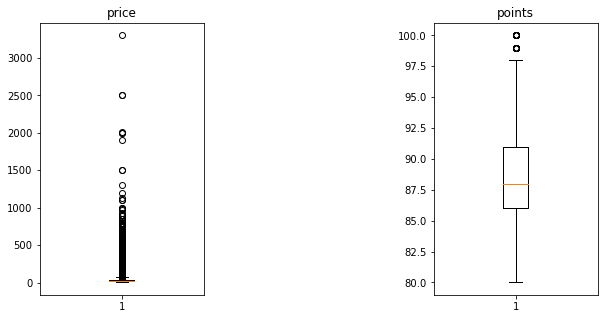

In [50]:
plt.figure(figsize=(10, 5))
plt.subplot(131)
plt.boxplot(train2.price.dropna())
plt.title('price')
plt.subplot(133)
plt.boxplot(train2.points)
plt.title('points')
plt.show()

### 1.3 数据缺失的处理     
观察数据集中缺失数据，分析其缺失的原因。分别使用下列四种策略对缺失值进行处理:   
+ 将缺失部分剔除   
+ 用最高频率值来填补缺失值    
+ 通过属性的相关关系来填补缺失值   
+ 通过数据对象之间的相似性来填补缺失值   

注意：在处理后，要可视化地对比新旧数据集。

#### 1.3.1 将缺失部分剔除    
(1). winemag-data_first150k.csv  
+ 直方图

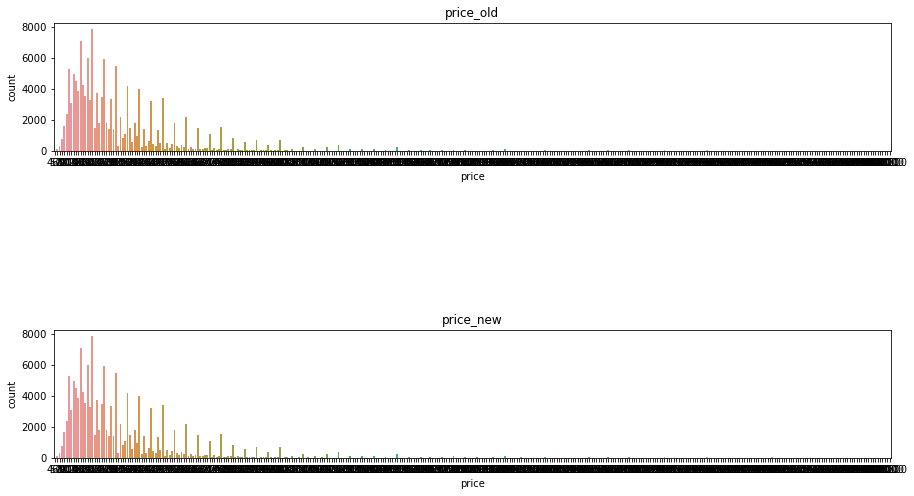

In [72]:
plt.figure(figsize=(15,8))
plt.subplot(311)
sns.countplot(train1.price)
plt.title('price_old')
plt.subplot(313)
sns.countplot(train1.price.dropna())
plt.title('price_new')
plt.show()

+ 盒图   
    由于盒图在绘制过程中需剔除缺失值，故结果不变。

(2)winemag-data-130k-v2.csv   
+ 直方图


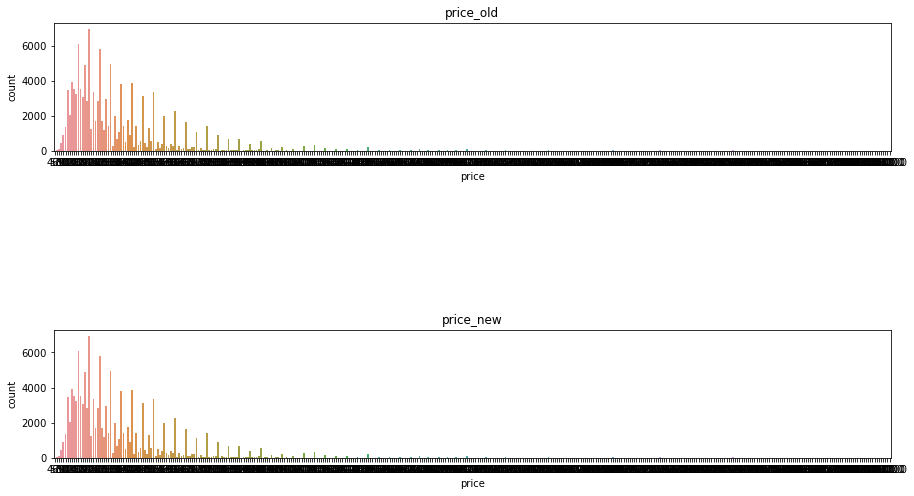

In [103]:
plt.figure(figsize=(15,8))
plt.subplot(311)
sns.countplot(train2.price)
plt.title('price_old')
plt.subplot(313)
sns.countplot(train2.price.dropna())
plt.title('price_new')
plt.show()

+ 盒图   
    由于盒图在绘制过程中需剔除缺失值，故结果不变。

#### 1.3.2 用最高频率值来填补缺失值   
(1). winemag-data_first150k.csv   
+ 直方图

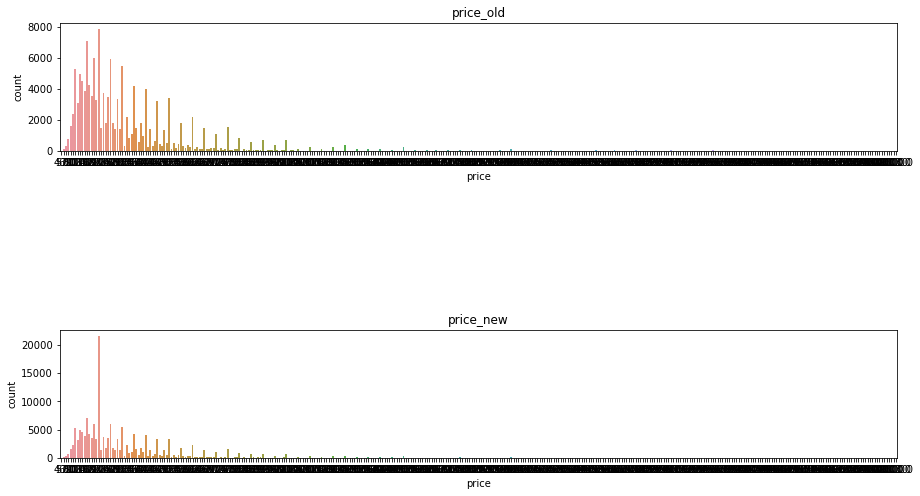

In [100]:
plt.figure(figsize=(15,8))
plt.subplot(311)
sns.countplot(train1.price)
plt.title('price_old')
plt.subplot(313)
sns.countplot(train1.price.fillna(train1['price'].value_counts().index[0]))
plt.title('price_new')
plt.show()

+ 盒图

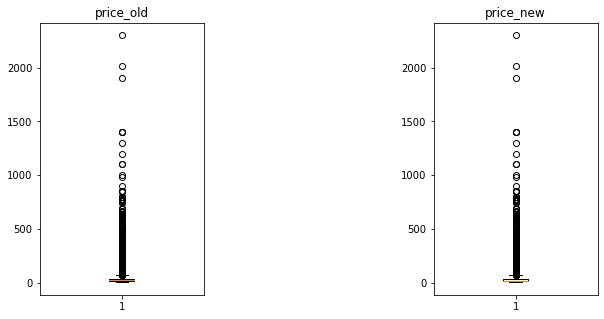

In [115]:
plt.figure(figsize=(10, 5))
plt.subplot(131)
plt.boxplot(train1.price.dropna())
plt.title('price_old')
plt.subplot(133)
plt.boxplot(train1.price.fillna(train1['price'].value_counts().index[0]))
plt.title('price_new')
plt.show()

(2)winemag-data-130k-v2.csv
+ 直方图

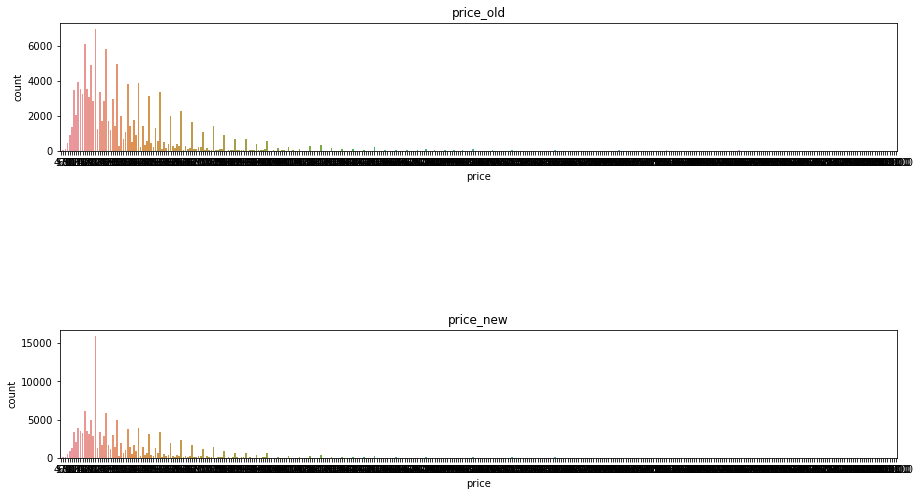

In [106]:
plt.figure(figsize=(15,8))
plt.subplot(311)
sns.countplot(train2.price)
plt.title('price_old')
plt.subplot(313)
sns.countplot(train2.price.fillna(train2['price'].value_counts().index[0]))
plt.title('price_new')
plt.show()

+ 盒图

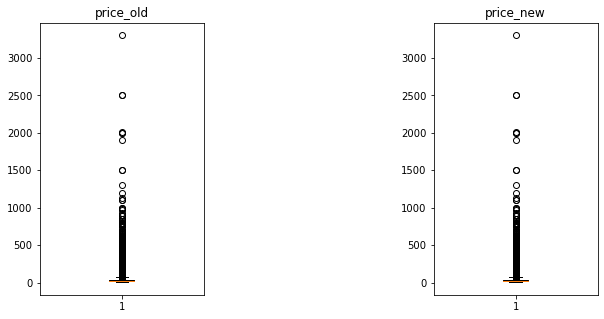

In [116]:
plt.figure(figsize=(10, 5))
plt.subplot(131)
plt.boxplot(train2.price.dropna())
plt.title('price_old')
plt.subplot(133)
plt.boxplot(train2.price.fillna(train2['price'].value_counts().index[0]))
plt.title('price_new')
plt.show()

#### 1.3.3 通过属性的相关关系来填补缺失值    
(1). winemag-data_first150k.csv  

In [127]:
data1 = train1[['points', 'price']].copy(deep=True)
data_pred = data1[np.isnan(data1['price'])]
known_price = data1[data1.price.notnull()].values
y = known_price[:, 0] # price
x = known_price[:, 1:] # points
line_reg = LinearRegression()
line_reg.fit(x, y)
data_pred['price'] = line_reg.predict(data_pred['points'].values.reshape(-1, 1))
data1.loc[(data1.price.isnull()), 'price'] = data_pred['price']
print(data1.shape)
print(data1.isnull().sum())

(150930, 2)
points    0
price     0
dtype: int64


<ipython-input-127-1a0a5966b08d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pred['price'] = line_reg.predict(data_pred['points'].values.reshape(-1, 1))


+ 直方图

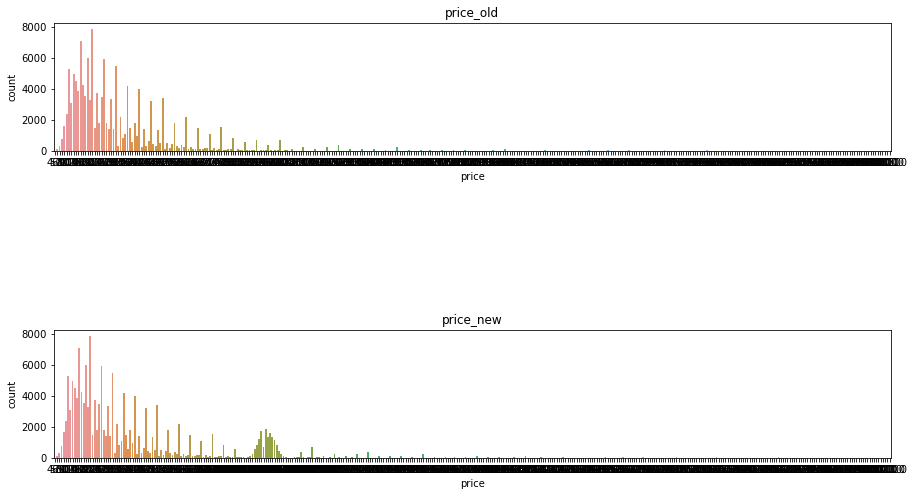

In [128]:
plt.figure(figsize=(15,8))
plt.subplot(311)
sns.countplot(train1.price)
plt.title('price_old')
plt.subplot(313)
sns.countplot(data1.price)
plt.title('price_new')
plt.show()

+ 盒图

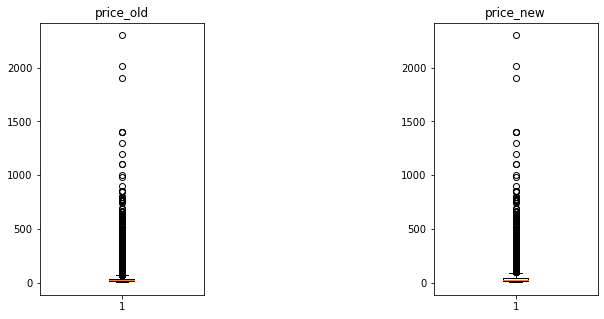

In [129]:
plt.figure(figsize=(10, 5))
plt.subplot(131)
plt.boxplot(train1.price.dropna())
plt.title('price_old')
plt.subplot(133)
plt.boxplot(data1.price)
plt.title('price_new')
plt.show()

(2)winemag-data-130k-v2.csv


In [131]:
data2 = train2[['points', 'price']].copy(deep=True)
data_pred = data2[np.isnan(data2['price'])]
known_price = data2[data2.price.notnull()].values
y = known_price[:, 0] # price
x = known_price[:, 1:] # points
line_reg = LinearRegression()
line_reg.fit(x, y)
data_pred['price'] = line_reg.predict(data_pred['points'].values.reshape(-1, 1))
data2.loc[(data2.price.isnull()), 'price'] = data_pred['price']
print(data2.shape)
print(data2.isnull().sum())

(129971, 2)
points    0
price     0
dtype: int64


<ipython-input-131-87fc8c8b11f3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pred['price'] = line_reg.predict(data_pred['points'].values.reshape(-1, 1))


+ 直方图

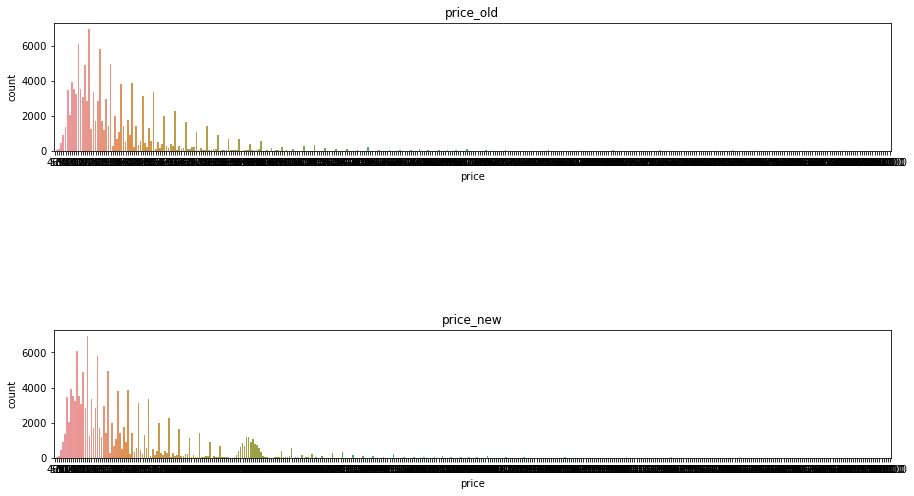

In [132]:
plt.figure(figsize=(15,8))
plt.subplot(311)
sns.countplot(train2.price)
plt.title('price_old')
plt.subplot(313)
sns.countplot(data2.price)
plt.title('price_new')
plt.show()

+ 盒图

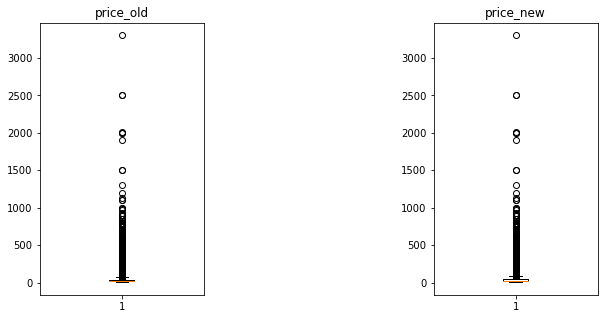

In [133]:
plt.figure(figsize=(10, 5))
plt.subplot(131)
plt.boxplot(train2.price.dropna())
plt.title('price_old')
plt.subplot(133)
plt.boxplot(data2.price)
plt.title('price_new')
plt.show()

#### 1.3.4 通过数据对象之间的相似性来填补缺失值    
(1). winemag-data_first150k.csv  

In [110]:
data1_copy = train1.copy(deep=True)
imputer = KNNImputer(n_neighbors=3)
data1_copy[['points', 'price']] = imputer.fit_transform(data1_copy[['points', 'price']])
print(data1_copy.isnull().sum())

Unnamed: 0         0
country            5
description        0
designation    45735
points             0
price              0
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64


+ 直方图

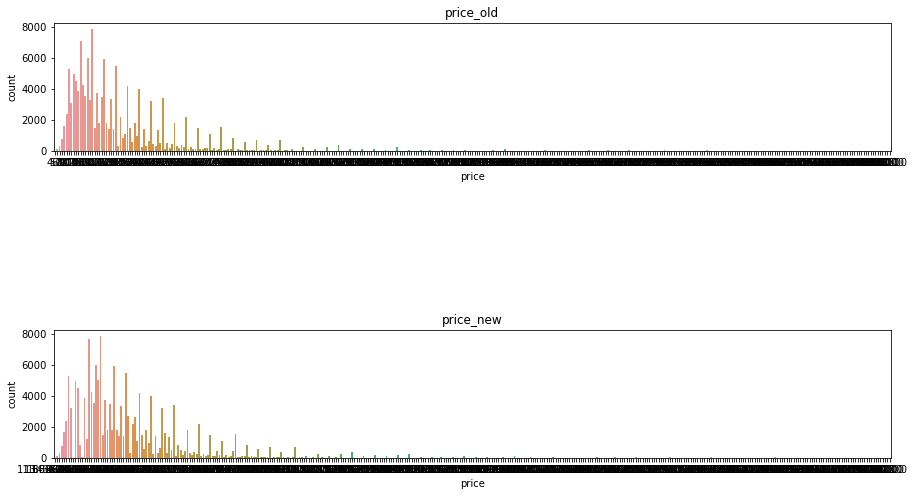

In [111]:
plt.figure(figsize=(15,8))
plt.subplot(311)
sns.countplot(train1.price)
plt.title('price_old')
plt.subplot(313)
sns.countplot(data1_copy.price)
plt.title('price_new')
plt.show()

+ 盒图

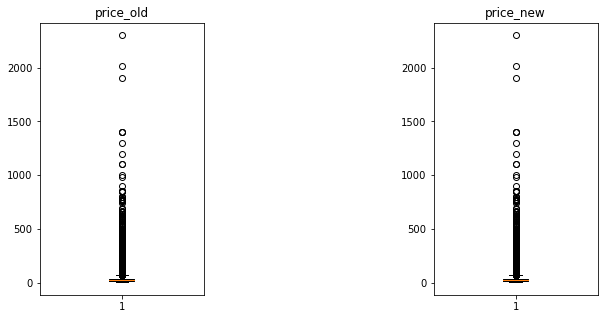

In [117]:
plt.figure(figsize=(10, 5))
plt.subplot(131)
plt.boxplot(train1.price.dropna())
plt.title('price_old')
plt.subplot(133)
plt.boxplot(data1_copy.price)
plt.title('price_new')
plt.show()

(2)winemag-data-130k-v2.csv

In [113]:
data2_copy = train2.copy(deep=True)
imputer = KNNImputer(n_neighbors=3)
data2_copy[['points', 'price']] = imputer.fit_transform(data2_copy[['points', 'price']])
print(data2_copy.isnull().sum())

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                        0
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64


+ 直方图

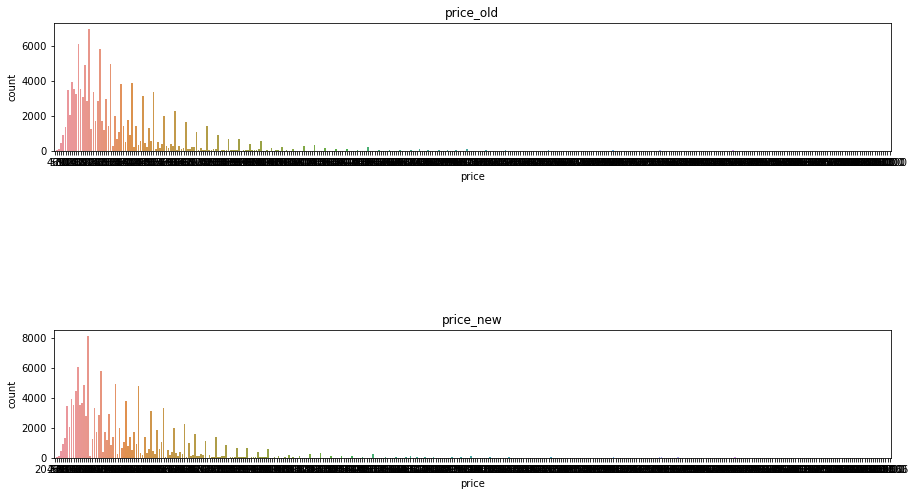

In [114]:
plt.figure(figsize=(15,8))
plt.subplot(311)
sns.countplot(train2.price)
plt.title('price_old')
plt.subplot(313)
sns.countplot(data2_copy.price)
plt.title('price_new')
plt.show()

+ 盒图

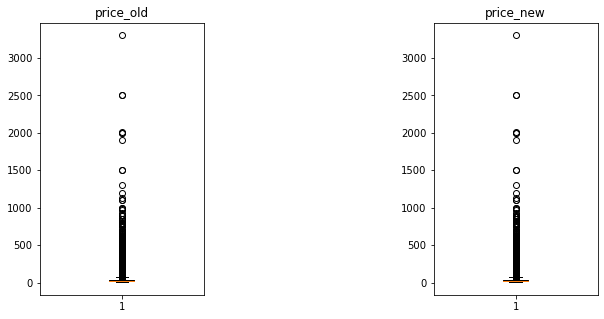

In [118]:
plt.figure(figsize=(10, 5))
plt.subplot(131)
plt.boxplot(train2.price.dropna())
plt.title('price_old')
plt.subplot(133)
plt.boxplot(data2_copy.price)
plt.title('price_new')
plt.show()

## 2. Chicago Building Violations
### 2.1 概述
+ 数据说明  
    "ID"  
    "VIOLATION LAST MODIFIED DATE"  
    "VIOLATION DATE":The date the violation was cited.  
    "VIOLATION CODE":The Violation Code.  
    "VIOLATION STATUS":  Complied = Violations have been addressed; Open = Violations are open; No Entry = Inspector could not gain access to the premise to conduct an inspection.
    "VIOLATION STATUS DATE"  
    "VIOLATION DESCRIPTION":The description of the violation corresponding to the Violation Code value.  
    "VIOLATION LOCATION"  
    "VIOLATION INSPECTOR COMMENTS"  
    "VIOLATION ORDINANCE"  
    "INSPECTOR ID"   
    "INSPECTION NUMBER"  
    "INSPECTION STATUS"  
    "INSPECTION WAIVED"  
    "INSPECTION CATEGORY":COMPLAINT – Inspection is a result of a 311 Complaint. PERIODIC – Inspection is a result of recurring inspection (typically on an annual cycle). PERMIT – Inspection is a result of a permit. REGISTRATION – Inspection is a result of a Registration (typically Vacant Building Registration).  
    "DEPARTMENT BUREAU"  
    "ADDRESS"  
    "STREET NUMBER"  
    "STREET DIRECTION"  
    "STREET NAME"  
    "STREET TYPE"  
    "PROPERTY GROUP":Properties (lots) in the City of Chicago can typically have multiple point addresses, range addresses and buildings. Examples are corner lots, large lots, lots with front and rear buildings, etc.. As a result, inspections (and their associated violations), permits and complaints related to a single property could have different addresses. This problem can be reconciled by using Property Group. All point and range addresses for a property are assigned the same Property Group key.  
    "SSA":Special Service Areas are local tax districts that fund expanded services and programs, to foster commercial and economic development, through a localized property tax. In other cities these areas are sometimes called Business Improvement Districts (BIDs). This portal contains a map of all Chicago SSAs.   
    "LATITUDE":经度  
    "LONGITUDE":纬度  
    "LOCATION"  
    "Community Areas"  
    "Zip Codes"
    "Boundaries - ZIP Codes"
    "Census Tracts"
    "Wards"
    "Historical Wards 2003-2015"
    
其中，Community Areas属于数值属性，VIOLATION STATUS,INSPECTION STATUS等属于标称属性。

+ 实验环境  
实现语言：Python  
依赖的包：numpy,pandas,matplotlib

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from  sklearn.ensemble import RandomForestClassifier
path = './Chicago building/building-violations.csv'
train = pd.read_csv(path)

In [174]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677788 entries, 0 to 1677787
Data columns (total 32 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   ID                            1677788 non-null  int64  
 1   VIOLATION LAST MODIFIED DATE  1677788 non-null  object 
 2   VIOLATION DATE                1677788 non-null  object 
 3   VIOLATION CODE                1677788 non-null  object 
 4   VIOLATION STATUS              1677788 non-null  object 
 5   VIOLATION STATUS DATE         641589 non-null   object 
 6   VIOLATION DESCRIPTION         1667020 non-null  object 
 7   VIOLATION LOCATION            780506 non-null   object 
 8   VIOLATION INSPECTOR COMMENTS  1502325 non-null  object 
 9   VIOLATION ORDINANCE           1630207 non-null  object 
 10  INSPECTOR ID                  1677788 non-null  object 
 11  INSPECTION NUMBER             1677788 non-null  int64  
 12  INSPECTION STATUS           

### 2.2 数据可视化和摘要

**数据摘要：**  
+ 标称属性，给出每个可能取值的频数  
+ 数值属性，给出5数概括及缺失值的个数


标称属性：  
(1). building-violations.csv

+ VIOLATION STATUS  

|VIOLATION STATUS|counts|
|:--:|:--:|
|OPEN|1030958|
|COMPLIED|641247|
|NO ENTRY|5583|
        

+ INSPECTION STATUS   

|INSPECTION STATUS|counts|
|:--:|:--:|
|FAILED|1159758|
|PASSED|293076|
|CLOSED|224784|
|HOLD|154|

由于其他标称属性的可能取值过多，不在此一一列举。

In [175]:
counts = train['INSPECTION STATUS'].value_counts()
print(counts)

FAILED    1159758
PASSED     293076
CLOSED     224784
HOLD          154
Name: INSPECTION STATUS, dtype: int64


数值属性  
+ 均值、标准差、5数概括

||Community Areas|
|:--:|:--:|
|mean|3.873350e+01|
|std|2.008963e+01|
|min|1.000000e+00|
|25%|2.400000e+01|
|50%|3.600000e+01|
|75%|5.800000e+01|
|max|7.700000e+01|
    
+ 缺失值个数

||缺失值个数|
|:--:|:--:|
|Community Areas|2279|

In [176]:
m = train['Community Areas'].describe()
print(m)
n = train['Community Areas'].isnull().sum()
print(n)

count    1.675509e+06
mean     3.873350e+01
std      2.008963e+01
min      1.000000e+00
25%      2.400000e+01
50%      3.600000e+01
75%      5.800000e+01
max      7.700000e+01
Name: Community Areas, dtype: float64
2279


**数据可视化：**    
+ 使用直方图、盒图等检查数据分布及离群点

 
+ 直方图

Text(0.5, 1.0, 'Community Areas')

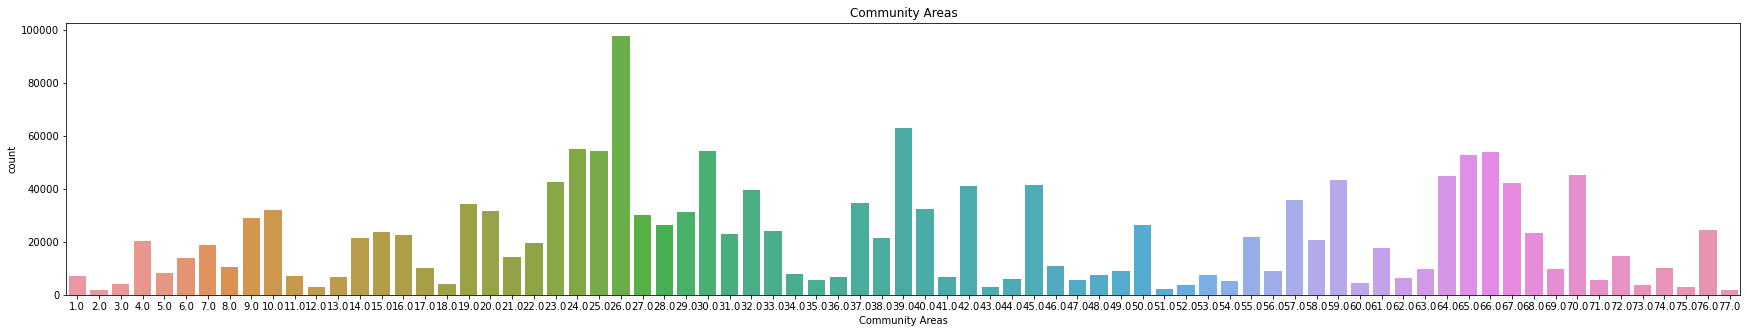

In [177]:
plt.figure(figsize=(30,5))
sns.countplot(train['Community Areas'])
# sns.distplot(train1.price)
plt.title('Community Areas')

+ 盒图

Text(0.5, 1.0, 'Community Areas')

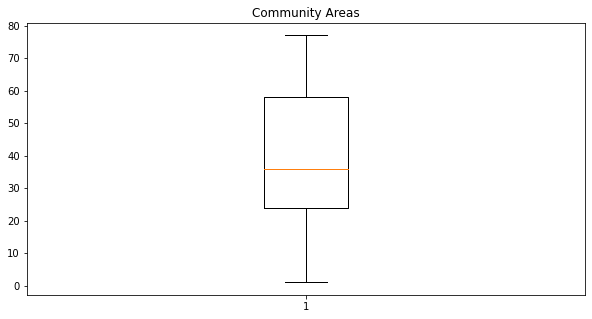

In [178]:
plt.figure(figsize=(10,5))
plt.boxplot(train['Community Areas'].dropna())
plt.title('Community Areas')

### 2.3 数据缺失的处理     
观察数据集中缺失数据，分析其缺失的原因。分别使用下列四种策略对缺失值进行处理:   
+ 将缺失部分剔除   
+ 用最高频率值来填补缺失值    
+ 通过属性的相关关系来填补缺失值   
+ 通过数据对象之间的相似性来填补缺失值   

注意：在处理后，要可视化地对比新旧数据集。

#### 2.3.1 将缺失部分剔除    
+ 直方图

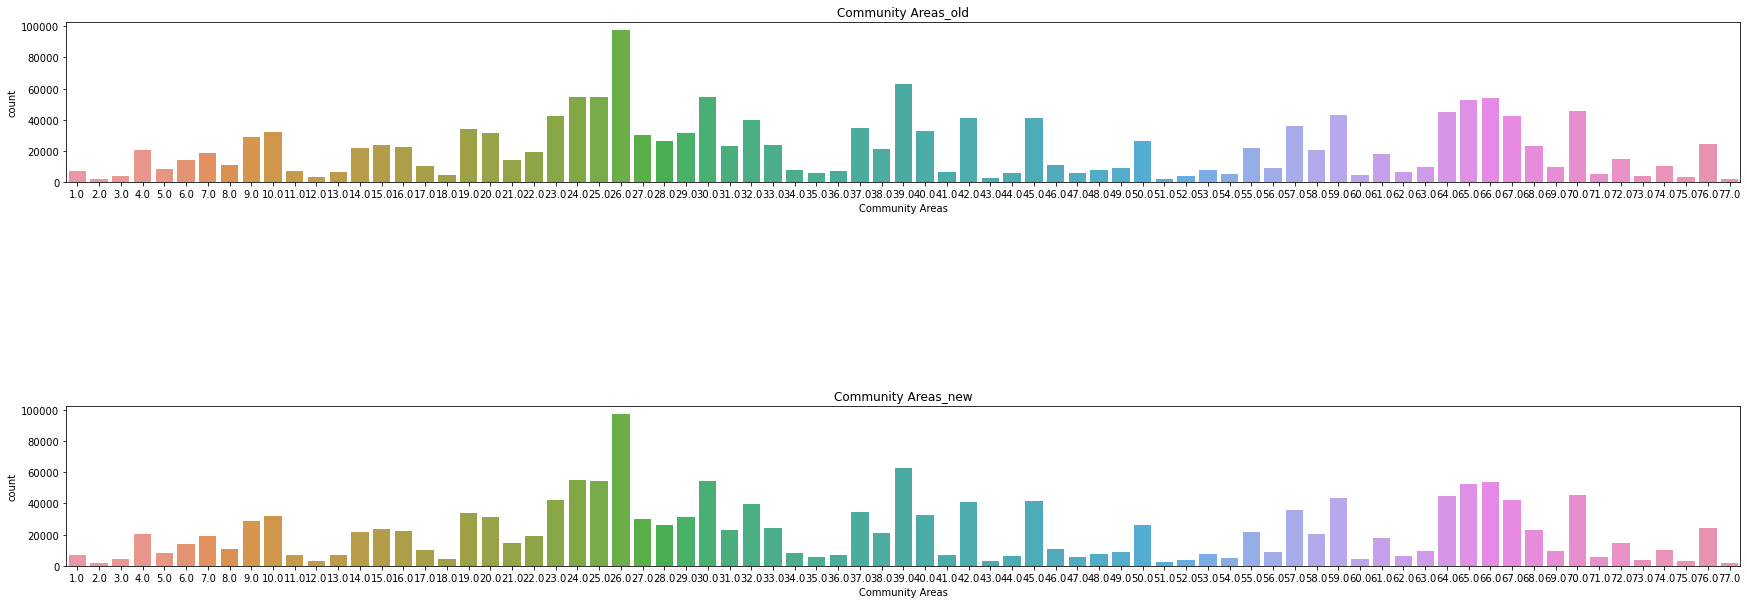

In [179]:
plt.figure(figsize=(30, 10))
plt.subplot(311)
sns.countplot(train['Community Areas'])
plt.title('Community Areas_old')
plt.subplot(313)
sns.countplot(train['Community Areas'].dropna())
plt.title('Community Areas_new')
plt.show()

+ 盒图  

由于盒图在绘制过程中需剔除缺失值，故结果不变。

#### 2.3.2 用最高频率值来填补缺失值    
+ 直方图

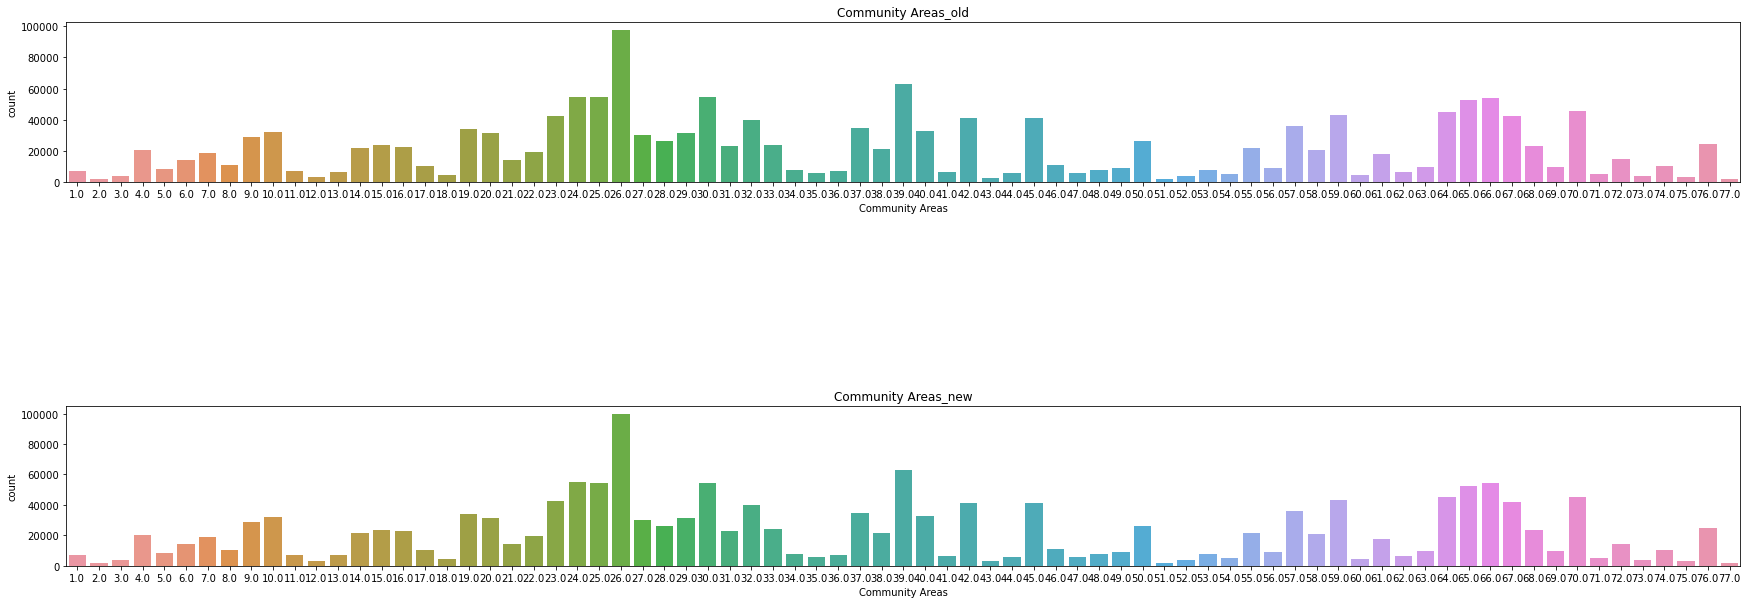

In [187]:
plt.figure(figsize=(30,10))
plt.subplot(311)
sns.countplot(train['Community Areas'])
plt.title('Community Areas_old')
plt.subplot(313)
sns.countplot(train['Community Areas'].fillna(train['Community Areas'].value_counts().index[0]))
plt.title('Community Areas_new')
plt.show()

+ 盒图

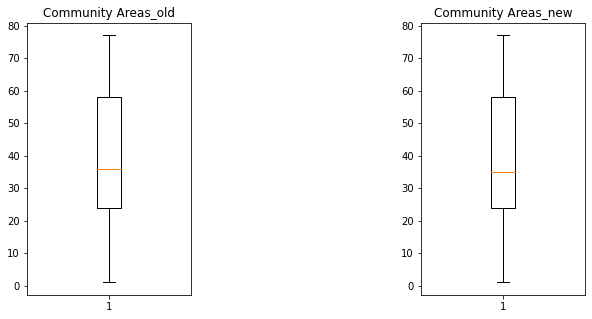

In [181]:
plt.figure(figsize=(10, 5))
plt.subplot(131)
plt.boxplot(train['Community Areas'].dropna())
plt.title('Community Areas_old')
plt.subplot(133)
plt.boxplot(train['Community Areas'].fillna(train['Community Areas'].value_counts().index[0]))
plt.title('Community Areas_new')
plt.show()

#### 2.3.3 通过属性的相关关系来填补缺失值    


In [182]:
data = train[['Community Areas', 'LATITUDE', 'LONGITUDE']]
print(data.shape)
# data0 = data[['LATITUDE', 'LONGITUDE']].fillna(0)
print(data['Community Areas'].notnull())
test = data[data['Community Areas'].notnull()]
test_x = test[['LATITUDE', 'LONGITUDE']].fillna(0)
test_y = test[['Community Areas']]
test_x = test_x.astype(float)
test_y = test_y.astype(float)
train = data[data['Community Areas'].isnull()]
train_x = train[['LATITUDE', 'LONGITUDE']].fillna(0).astype(float)
train_y = train[['Community Areas']].astype(float)
print("test")
rfc = RandomForestClassifier()
rfc.fit(test_x, test_y)
pre = rfc.predict(train_x)
# data[data['Community Areas'].isnull(), 'Community Areas'] = pre
data.loc[(data['Community Areas'].isnull()), 'Community Areas'] = pre
print(data.isnull().sum())


(1677788, 3)
0          True
1          True
2          True
3          True
4          True
           ... 
1677783    True
1677784    True
1677785    True
1677786    True
1677787    True
Name: Community Areas, Length: 1677788, dtype: bool
test


<ipython-input-182-0a6f065bbfbe>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(test_x, test_y)


Community Areas       0
LATITUDE           1510
LONGITUDE          1510
dtype: int64


+ 直方图

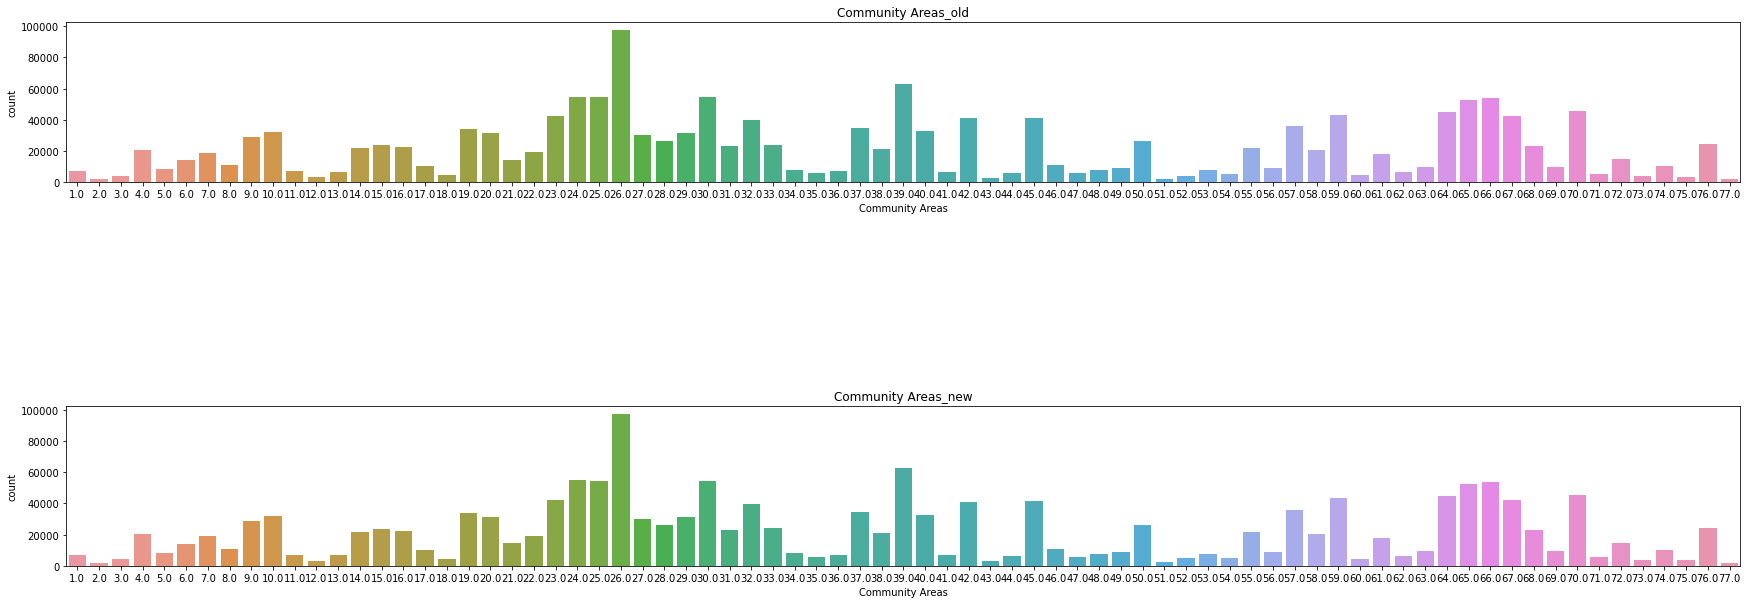

In [188]:
plt.figure(figsize=(30,10))
plt.subplot(311)
sns.countplot(train['Community Areas'])
plt.title('Community Areas_old')
plt.subplot(313)
sns.countplot(data['Community Areas'])
plt.title('Community Areas_new')
plt.show()

+ 盒图

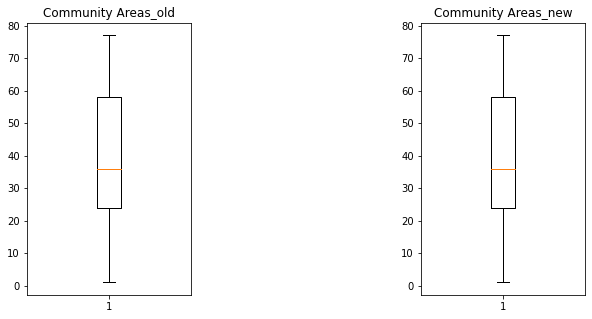

In [189]:
plt.figure(figsize=(10, 5))
plt.subplot(131)
plt.boxplot(train['Community Areas'].dropna())
plt.title('Community Areas_old')
plt.subplot(133)
plt.boxplot(data['Community Areas'])
plt.title('Community Areas_new')
plt.show()

#### 2.3.4 通过数据对象之间的相似性来填补缺失值    
 

In [191]:
data_copy = train.copy(deep=True)
imputer = KNNImputer(n_neighbors=3)
data_copy['LATITUDE'].fillna(0)
data_copy['LONGITUDE'].fillna(0)
data_copy[['Community Areas', 'LATITUDE', 'LONGITUDE']] = imputer.fit_transform(data_copy[['Community Areas', 'LATITUDE', 'LONGITUDE']])
print(data_copy.isnull().sum())

ID                                    0
VIOLATION LAST MODIFIED DATE          0
VIOLATION DATE                        0
VIOLATION CODE                        0
VIOLATION STATUS                      0
VIOLATION STATUS DATE           1036199
VIOLATION DESCRIPTION             10768
VIOLATION LOCATION               897282
VIOLATION INSPECTOR COMMENTS     175463
VIOLATION ORDINANCE               47581
INSPECTOR ID                          0
INSPECTION NUMBER                     0
INSPECTION STATUS                    16
INSPECTION WAIVED                     0
INSPECTION CATEGORY                   0
DEPARTMENT BUREAU                     0
ADDRESS                               0
STREET NUMBER                         0
STREET DIRECTION                      0
STREET NAME                           0
STREET TYPE                       13541
PROPERTY GROUP                        0
SSA                             1356267
LATITUDE                              0
LONGITUDE                             0


+ 直方图

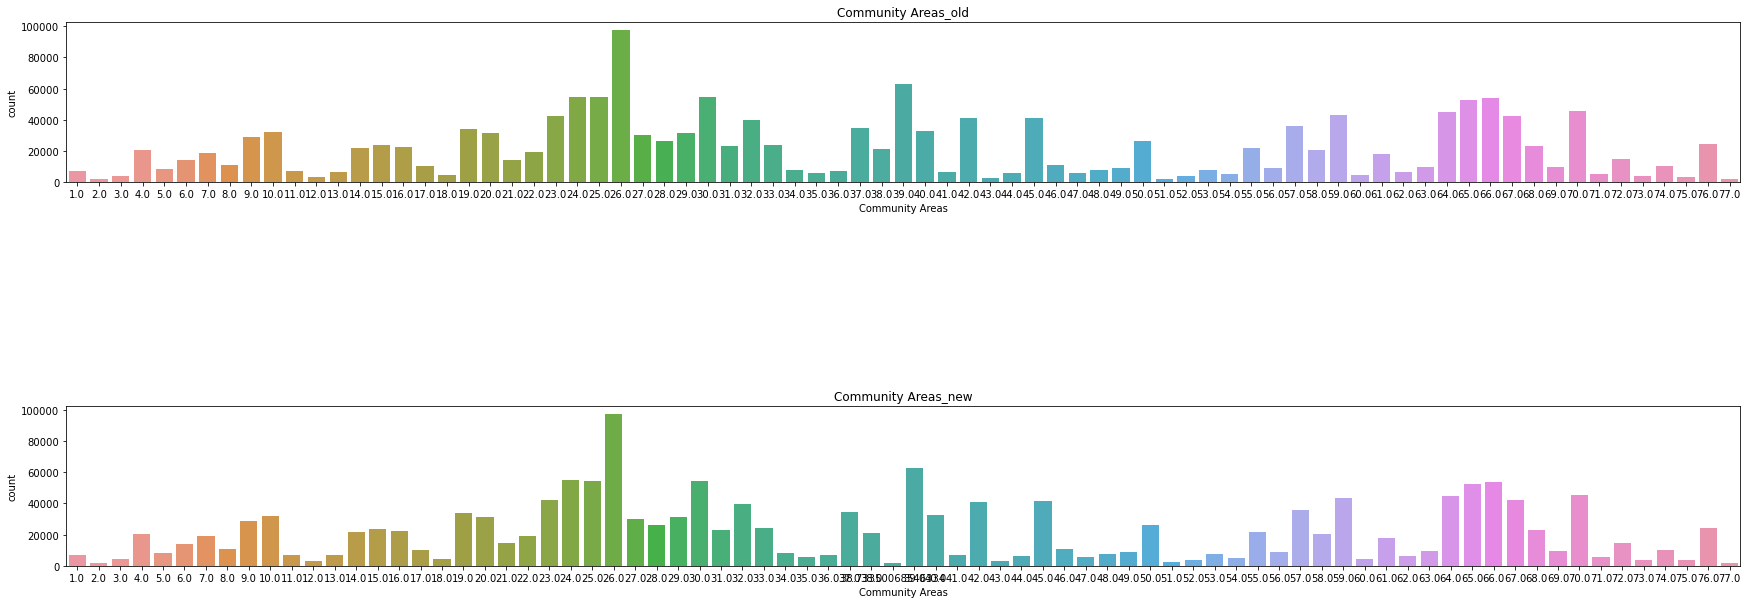

In [192]:
plt.figure(figsize=(30,10))
plt.subplot(311)
sns.countplot(train['Community Areas'])
plt.title('Community Areas_old')
plt.subplot(313)
sns.countplot(data_copy['Community Areas'])
plt.title('Community Areas_new')
plt.show()

+ 盒图

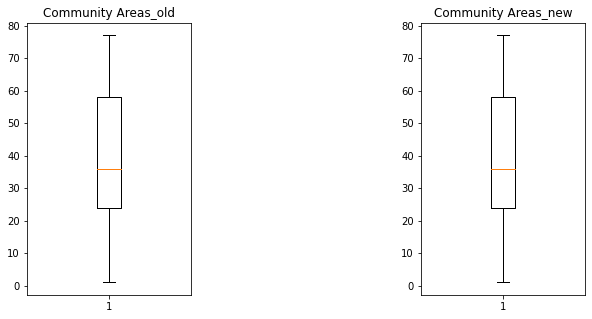

In [193]:
plt.figure(figsize=(10, 5))
plt.subplot(131)
plt.boxplot(train['Community Areas'].dropna())
plt.title('Community Areas_old')
plt.subplot(133)
plt.boxplot(data['Community Areas'])
plt.title('Community Areas_new')
plt.show()